# Likes❤️ clfsn with spotify data 🎼🎵🎵

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
playlist=pd.read_csv(r'C:/Users/Srujith Reddy/OneDrive/Desktop/DataSets/spofifydata.csv')
playlist.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [3]:
playlist = playlist.loc[:, ~playlist.columns.str.contains('^Unnamed')]
playlist.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
playlist.info

<bound method DataFrame.info of       acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0          0.01020         0.833       204600   0.434          0.021900    2   
1          0.19900         0.743       326933   0.359          0.006110    1   
2          0.03440         0.838       185707   0.412          0.000234    2   
3          0.60400         0.494       199413   0.338          0.510000    5   
4          0.18000         0.678       392893   0.561          0.512000    5   
...            ...           ...          ...     ...               ...  ...   
2012       0.00106         0.584       274404   0.932          0.002690    1   
2013       0.08770         0.894       182182   0.892          0.001670    1   
2014       0.00857         0.637       207200   0.935          0.003990    0   
2015       0.00164         0.557       185600   0.992          0.677000    1   
2016       0.00281         0.446       204520   0.915          0.000039    9   

      l

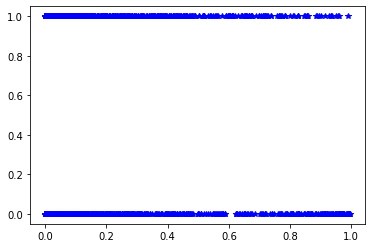

In [5]:
x=playlist['acousticness'].to_numpy()
y=playlist['target'].to_numpy()
plt.plot(x,y,'b*')

In [6]:
playlist['target'].value_counts()

1    1020
0     997
Name: target, dtype: int64

# Seperating categorical and numerical data

In [7]:
cat_cols=playlist.select_dtypes(exclude="number").columns
cat_cols
num_cols=playlist.select_dtypes(include="number").columns
num_cols

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target'],
      dtype='object')

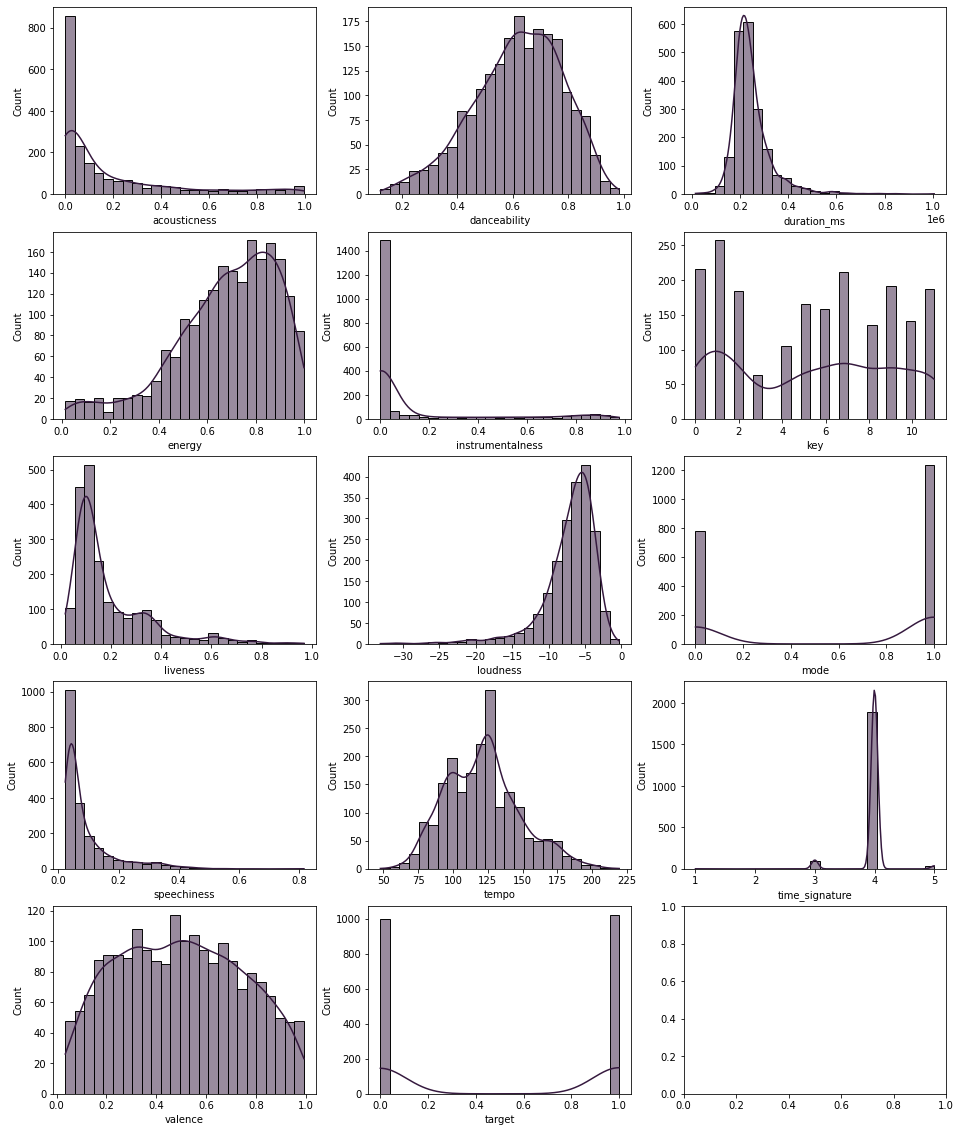

In [8]:
sns.set_palette('rocket')
fig,axes=plt.subplots(5,3,figsize=(16,20))
axes=axes.flatten()
ax_no=0
for col in num_cols:
    sns.histplot(data=playlist,x=col,bins=25,kde=True,ax=axes[ax_no])
    ax_no+=1
plt.show()

In [9]:
continuous_cols=['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','tempo','valence','speechiness']
discrete_cols=['key','mode','time_signature','target']

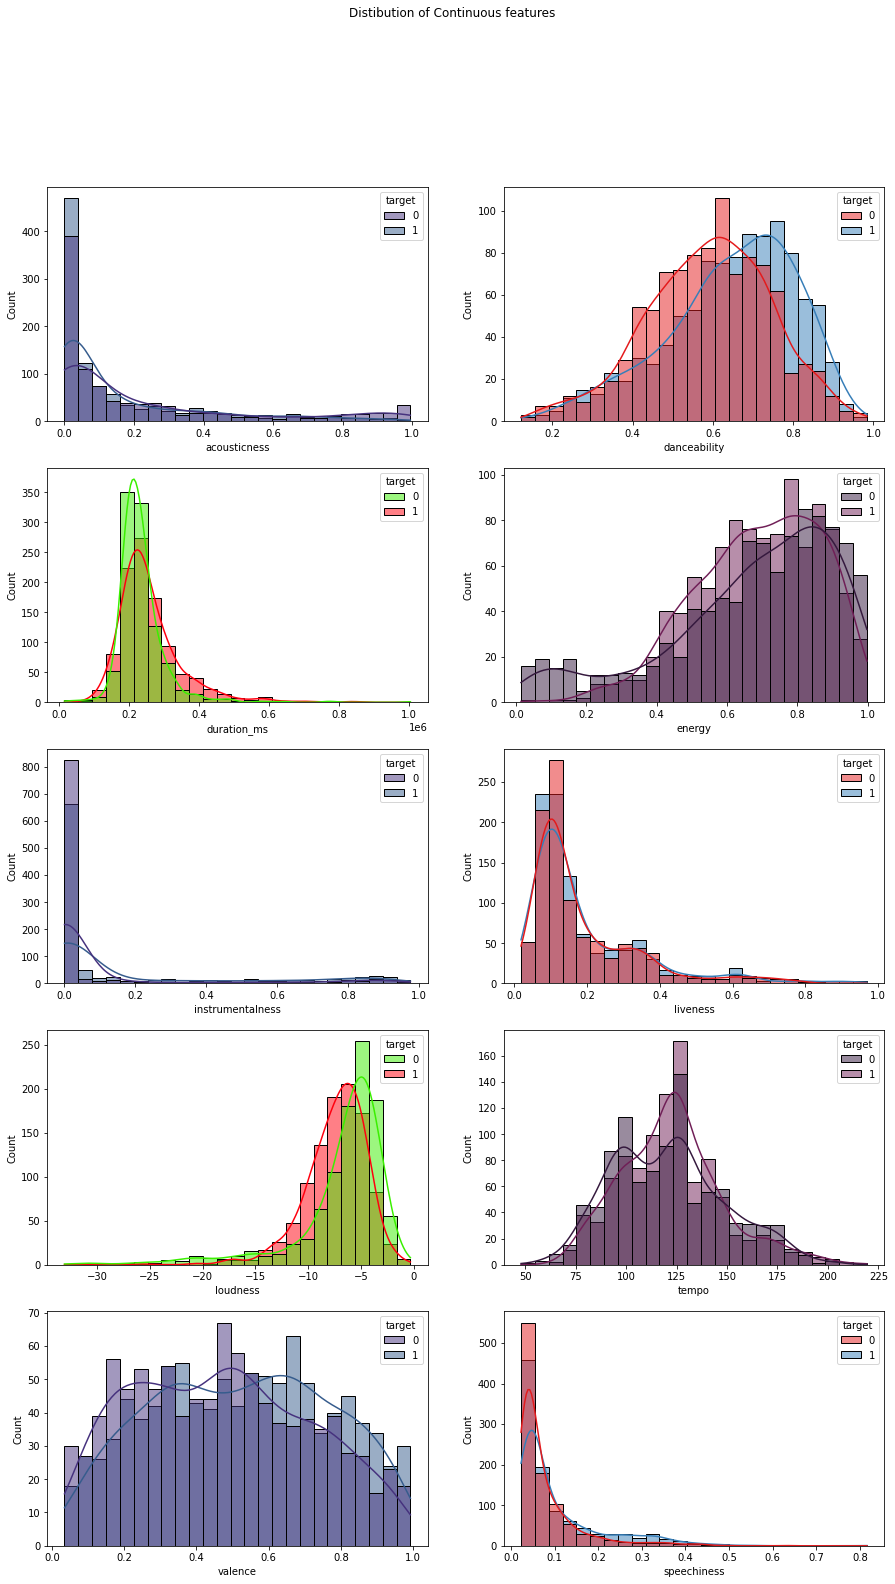

In [10]:
fig,axes=plt.subplots(5,2,figsize=(15,25))
palettes=['viridis','Set1','prism','rocket']
axes=axes.flatten()
ax_no=0
for col in continuous_cols:
    sns.set_palette(palettes[ax_no%4])
    sns.histplot(data=playlist,x=col,hue='target',bins=25,kde=True,ax=axes[ax_no])
    ax_no+=1
fig.suptitle("Distibution of Continuous features")
plt.show()


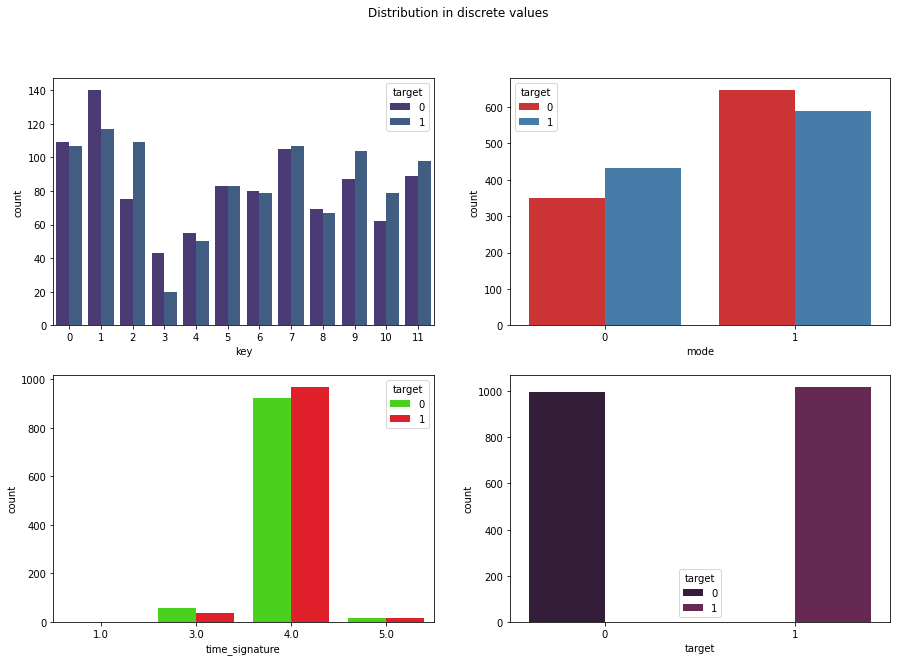

In [11]:
# Visualisation for discreted data
fig,axes=plt.subplots(2,2,figsize=(15,10))
palettes=['viridis','Set1','prism','rocket']
axes=axes.flatten()
ax_no=0
for col in discrete_cols:
    sns.set_palette(palettes[ax_no%4])
    sns.countplot(data=playlist,x=col,hue='target',ax=axes[ax_no])
    ax_no+=1
fig.suptitle("Distribution in discrete values")
plt.show()
    

### Finding Correlations